In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
STATS_CSV = "Seasons_Stats.csv"
PLAYER_DATA_CSV = "player_data.csv"

VIEW_SAMPLE = 10

# play_data = pd.read_csv(PLAYER_DATA_CSV)
# print(play_data.shape)

# play_data1 = play_data.dropna(0)
# print(play_data1.shape)


#Reads data, drops useless columns
stats = pd.read_csv(STATS_CSV)
stats = stats.drop(['blanl', 'blank2', 'Unnamed: 0', 'Player', 'Tm', 'GS', 'G', 'OWS', 'DWS', 'WS', 'WS/48'], axis=1)

#Keep columns with data we want, drop useless rows
stats = stats[['Pos', 'Age', 'TS%', '3PAr', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TRB%', 'USG%', 'FG%', '3P%', '2P%', 'FT%']]
stats = stats.dropna(0)
pos = ['C', 'PF', 'PG', 'SG', 'SF']
stats = stats[stats['Pos'].isin(pos)].sample(n=5000, random_state=21)

#Get and normalize the features
X = stats.drop(['Pos'], axis=1).to_numpy()
normalize(X, copy=False)

#Get and normalize the target
y = stats['Pos']
for i in range(5):
    y = y.replace(to_replace=pos[i], value=i)
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [44]:
model = LogisticRegression(penalty='none', multi_class='multinomial', max_iter=10000)
model.fit(X_train,y_train)
acc_test = model.score(X_test, y_test)
acc_train = model.score(X_train, y_train)
print(acc_test, acc_train)

0.6315151515151515 0.6447761194029851


In [4]:
pred = model.predict(X_test[0:VIEW_SAMPLE])

for i in range(VIEW_SAMPLE):
    print('Predicted:', pred[i], '\tActual:', y_test[i])

coefs = model.coef_
print(coefs)

Predicted: 3 	Actual: 3
Predicted: 2 	Actual: 2
Predicted: 1 	Actual: 1
Predicted: 3 	Actual: 3
Predicted: 1 	Actual: 1
Predicted: 2 	Actual: 2
Predicted: 3 	Actual: 2
Predicted: 4 	Actual: 4
Predicted: 4 	Actual: 4
Predicted: 3 	Actual: 4
[[ 7.91419378e+00  9.81253063e+01 -1.82534283e+02  1.33494101e+01
  -1.04022200e+00 -4.68210770e+01  3.26639112e+01  1.33494101e+01
   2.64763852e+00  9.09014605e+01 -1.28534661e+01 -2.83950864e+02
  -9.67386272e+01]
 [ 6.66261938e+00  1.52257146e+01 -7.13606381e+00  1.21129316e+01
  -1.67470305e+00 -2.28470937e+01  1.29924588e+01  1.21129316e+01
   4.19221334e+00 -4.55304824e+01  1.00584183e+01  1.21137418e+01
  -6.20550209e+01]
 [-8.62828908e+00 -2.60526460e+02  1.50931904e+02 -1.56071595e+01
   7.11632140e+00  3.46507647e+01 -3.90998594e+01 -1.56071595e+01
  -7.60652701e+00  3.12334408e+02 -1.39960034e+01 -5.35058942e+01
   9.50579338e+01]
 [-4.66697443e+00  4.23777131e+01  4.31416222e+01 -8.99337497e+00
  -8.34991166e-01  2.33493744e+01 -1.187590

In [7]:
feature_labels = ['Age', 'TS%', '3PAr', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TRB%', 'USG%', 'FG%', '3P%', '2P%', 'FT%']
for i in range(5):
    print("==============================")
    print(pos[i])
    for j in range(13):
        print(feature_labels[j], ": ", coefs[i][j])

C
Age :  7.9141937836797664
TS% :  98.125306319622
3PAr :  -182.53428325397886
TRB% :  13.349410131047083
AST% :  -1.0402220013619456
STL% :  -46.821077030947556
BLK% :  32.66391121640712
TRB% :  13.349410131047083
USG% :  2.647638522384487
FG% :  90.90146052622052
3P% :  -12.853466136750946
2P% :  -283.95086444821123
FT% :  -96.73862723095768
PF
Age :  6.662619383085026
TS% :  15.225714618796134
3PAr :  -7.1360638066948505
TRB% :  12.112931560374534
AST% :  -1.6747030530877487
STL% :  -22.84709366089055
BLK% :  12.992458846214436
TRB% :  12.112931560374534
USG% :  4.192213341604028
FG% :  -45.53048239763996
3P% :  10.058418308686184
2P% :  12.11374184534788
FT% :  -62.05502090265732
PG
Age :  -8.628289082225487
TS% :  -260.52646037719927
3PAr :  150.93190425459036
TRB% :  -15.607159521213823
AST% :  7.116321403725067
STL% :  34.650764742821885
BLK% :  -39.099859443183334
TRB% :  -15.607159521213823
USG% :  -7.606527010883113
FG% :  312.33440757433607
3P% :  -13.996003357280578
2P% :  

In [8]:
def show_weights(coeff):
    for i in range(coeff.shape[0]):
        print("==============================")
        print(pos[i]) #constant pos
        for j in range(coeff.shape[1]):
            print(feature_labels[j], ": ", coeff[i][j])

In [9]:
show_weights(coefs)

C
Age :  7.9141937836797664
TS% :  98.125306319622
3PAr :  -182.53428325397886
TRB% :  13.349410131047083
AST% :  -1.0402220013619456
STL% :  -46.821077030947556
BLK% :  32.66391121640712
TRB% :  13.349410131047083
USG% :  2.647638522384487
FG% :  90.90146052622052
3P% :  -12.853466136750946
2P% :  -283.95086444821123
FT% :  -96.73862723095768
PF
Age :  6.662619383085026
TS% :  15.225714618796134
3PAr :  -7.1360638066948505
TRB% :  12.112931560374534
AST% :  -1.6747030530877487
STL% :  -22.84709366089055
BLK% :  12.992458846214436
TRB% :  12.112931560374534
USG% :  4.192213341604028
FG% :  -45.53048239763996
3P% :  10.058418308686184
2P% :  12.11374184534788
FT% :  -62.05502090265732
PG
Age :  -8.628289082225487
TS% :  -260.52646037719927
3PAr :  150.93190425459036
TRB% :  -15.607159521213823
AST% :  7.116321403725067
STL% :  34.650764742821885
BLK% :  -39.099859443183334
TRB% :  -15.607159521213823
USG% :  -7.606527010883113
FG% :  312.33440757433607
3P% :  -13.996003357280578
2P% :  

In [11]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [45]:
tr_acc = []
ts_acc = []
for c in cVals:
    model_l1 = LogisticRegression(penalty='l1', C=c, solver='saga', random_state=21, multi_class='multinomial', max_iter=10000)
    model_l1.fit(X_train,y_train)
    acc = model_l1.score(X_test, y_test)
    ts_acc.append(acc)
    acc = model_l1.score(X_train, y_train)
    tr_acc.append(acc)

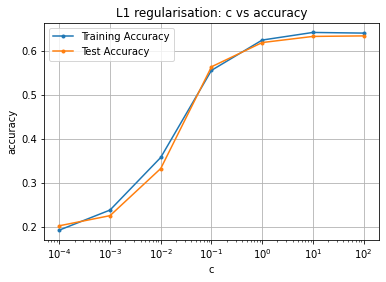

In [46]:
plt.plot(cVals,tr_acc,'.-')
plt.plot(cVals,ts_acc,'.-')
plt.xlabel('c')
plt.ylabel('accuracy')
plt.xscale('log')
#plt.ylim((0.64,0.645))
plt.title('L1 regularisation: c vs accuracy')
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show(block=False)

In [38]:
print(tr_acc, ts_acc)

[0.1919402985074627, 0.23761194029850746, 0.36149253731343284, 0.5889552238805971, 0.6298507462686567, 0.6417910447761194, 0.6462686567164179] [0.2018181818181818, 0.22484848484848485, 0.33454545454545453, 0.5927272727272728, 0.6284848484848485, 0.6430303030303031, 0.6393939393939394]


In [47]:
tr_acc = []
ts_acc = []
for c in cVals:
    model_l2 = LogisticRegression(penalty='l2', C=c, multi_class='multinomial', max_iter=10000)
    model_l2.fit(X_train,y_train)
    acc = model_l2.score(X_test, y_test)
    ts_acc.append(acc)
    acc = model_l2.score(X_train, y_train)
    tr_acc.append(acc)

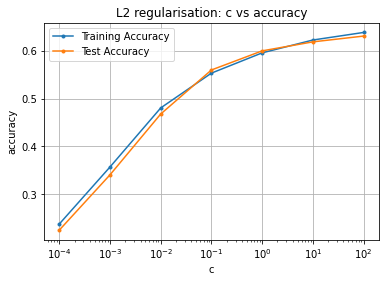

In [48]:
plt.plot(cVals,tr_acc,'.-')
plt.plot(cVals,ts_acc,'.-')
plt.xlabel('c')
plt.ylabel('accuracy')
plt.xscale('log')
#plt.ylim((0.64,0.645))
plt.title('L2 regularisation: c vs accuracy')
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show(block=False)

# Logistic Regression Using Polynomial Feature Transformation


In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(2)

In [43]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

In [52]:
# L1 with transforms
tr_acc = []
ts_acc = []
for c in cVals:
    model_l1 = LogisticRegression(penalty='l1', C=c, solver='saga', random_state=21, multi_class='multinomial', max_iter=10000)
    model_l1.fit(X_transformed_train,y_train)
    acc = model_l1.score(X_transformed_test, y_test)
    ts_acc.append(acc)
    acc = model_l1.score(X_transformed_train, y_train)
    tr_acc.append(acc)

In [50]:
def plot_acc(tr_acc, ts_acc, title):
    plt.plot(cVals,tr_acc,'.-')
    plt.plot(cVals,ts_acc,'.-')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.xscale('log')
    plt.title(title)
    plt.grid()
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.show(block=False)

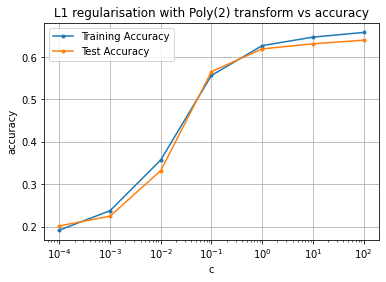

In [53]:
plot_acc(tr_acc,ts_acc,"L1 regularisation with Poly(2) transform vs accuracy")

In [54]:
# L2 with transforms
tr_acc = []
ts_acc = []
for c in cVals:
    model_l2 = LogisticRegression(penalty='l2', C=c, random_state=21, multi_class='multinomial', max_iter=10000)
    model_l2.fit(X_transformed_train,y_train)
    acc = model_l2.score(X_transformed_test, y_test)
    ts_acc.append(acc)
    acc = model_l2.score(X_transformed_train, y_train)
    tr_acc.append(acc)

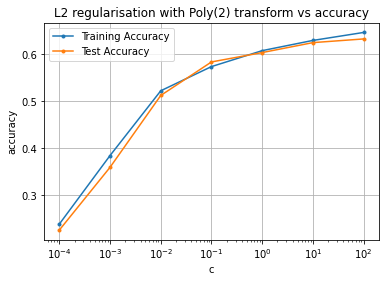

In [55]:
plot_acc(tr_acc,ts_acc,"L2 regularisation with Poly(2) transform vs accuracy")

In [56]:
print(tr_acc, ts_acc)

[0.23761194029850746, 0.3838805970149254, 0.5220895522388059, 0.5737313432835821, 0.6077611940298507, 0.6295522388059701, 0.6465671641791044] [0.22484848484848485, 0.35878787878787877, 0.5121212121212121, 0.5836363636363636, 0.6036363636363636, 0.6248484848484849, 0.6327272727272727]


In [57]:
print(max(tr_acc), max(ts_acc))

0.6465671641791044 0.6327272727272727


In [59]:
model_none = LogisticRegression(penalty='none', random_state=21, multi_class='multinomial', max_iter=10000)
model_none.fit(X_transformed_train,y_train)
acc = model_none.score(X_transformed_test, y_test)
print(acc)
acc = model_none.score(X_transformed_train, y_train)
print(acc)

0.6327272727272727
0.6597014925373135


c:\users\andrew qu\.virtualenvs\andrew_qu-3aprwf1j\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
